In [3]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:* Carolina Pabón Rúa

*Identificación:* 1023625942

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



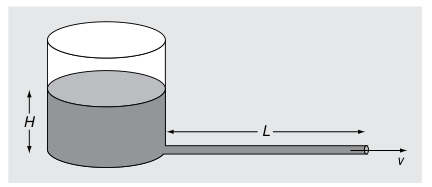

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [4]:
# a)
def velocidad_descarga(H, L, t):
    g = 9.81
    return np.sqrt(2 * g * H) * np.tanh(np.sqrt(2 * g * H) * t / (2 * L))


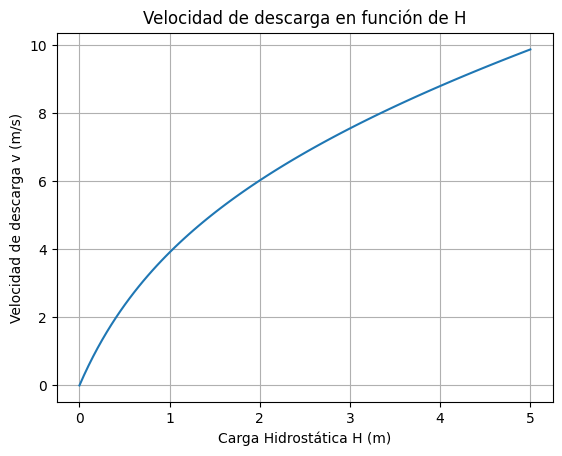

In [5]:
#b)
L = 4
t = 2.5
H_values = np.linspace(0, 5, 100)

v_values = velocidad_descarga(H_values, L, t)

plt.plot(H_values, v_values)
plt.xlabel('Carga Hidrostática H (m)')
plt.ylabel('Velocidad de descarga v (m/s)')
plt.title('Velocidad de descarga en función de H')
plt.grid(True)
plt.show()

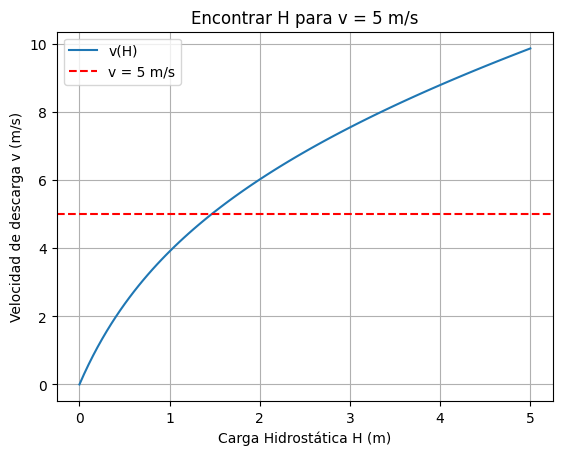

In [6]:
#c)
plt.plot(H_values, v_values, label='v(H)')
plt.axhline(y=5, color='r', linestyle='--', label='v = 5 m/s')
plt.xlabel('Carga Hidrostática H (m)')
plt.ylabel('Velocidad de descarga v (m/s)')
plt.title('Encontrar H para v = 5 m/s')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#d

def f(H, L, t):
    g = 9.81  # m/s^2
    return np.sqrt(2 * g * H) * np.tanh(np.sqrt(2 * g * H) * t / (2 * L))-5

def biseccion(f, a, b, L, t, tol=1e-7):
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c, L, t) == 0:
            return c
        elif f(a, L, t) * f(c, L, t) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

a = 0.1
b = 5

H_biseccion = biseccion(f, a, b, L, t)
print(f"Carga hidrostática necesaria (método de bisección): {H_biseccion} m")


Carga hidrostática necesaria (método de bisección): 1.4658946529030796 m


In [8]:
#e)
from scipy.optimize import newton
def funcion_raiz(H):
    return velocidad_descarga(H, L=4, t=2.5) - 5
H_raiz_newton = newton(funcion_raiz, x0=2)
print("Carga hidrostática necesaria (Newton):", H_raiz_newton)




Carga hidrostática necesaria (Newton): 1.465894588476788


In [13]:
#Error relativo
error_relativo = abs((H_raiz_newton - H_biseccion) / H_biseccion) * 100
print("Error relativo (%):", error_relativo)

Error relativo (%): 4.395015119766891e-06


# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




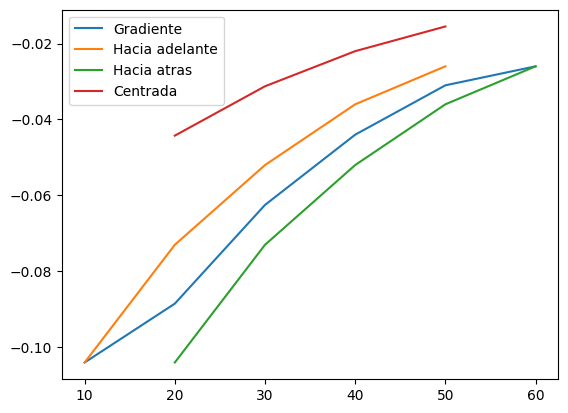

In [9]:
import numpy as np
import matplotlib.pyplot  as plt

#a)
data = {'t':[10,20,30,40,50,60],'c':[3.52,2.48,1.75,1.23,0.87,0.61]}
t_= data['t']
c_= data['c']

def hacia_adelante(x,y):
  return np.array([(y[i +1]-y[i])/(x[i+1]-x[i]) for i in range(len(x)-1)])

def hacia_atras(x,y):
  return np.array([(y[i]-y[i-1])/(x[i]-x[i-1]) for i in range(1,len(x))])

def centrada(x,y):
  return np.array([(y[i+1]-y[i-1])/(2*(x[i+1]-x[i-1])) for i in range(1,len(x)-1)])

df_d= hacia_adelante(t_,c_)
df_a= hacia_atras(t_,c_)
df_c= centrada(t_,c_)
df_grad=np.gradient(c_,t_)


df_d = np.append(df_d,np.nan)
df_a = np.insert(df_a,0,np.nan)
df_c = np.append(df_c,np.nan)
df_c = np.insert(df_c, 0, np.nan)

#b) En la gráfica se puede ver la comparación con el Gradiente en verde
plt.plot(t_,df_grad, label = 'Gradiente')
plt.plot(t_,df_d, label = 'Hacia adelante')
plt.plot(t_,df_a, label = 'Hacia atras')
plt.plot(t_,df_c, label = 'Centrada')
plt.legend()


In [10]:
#c)
from scipy.stats import linregress


data = {'t': [10, 20, 30, 40, 50, 60], 'c': [3.52, 2.48, 1.75, 1.23, 0.87, 0.61]}
t_ = np.array(data['t'])
c_ = np.array(data['c'])

ln_t = np.log(t_)
ln_c = np.log(c_)


slope, intercept, r_value, p_value, std_err = linregress(ln_t, ln_c)


n = slope
ln_k = intercept
k = np.exp(ln_k)


print(f"Valor de n (pendiente): {n}")
print(f"Valor de k (intercepto): {k}")


Valor de n (pendiente): -0.9566331207882294
Valor de k (intercepto): 37.902457548338255


Se que ya había mandado este punto, pero me dí cuenta de lo que hice mal y acá ya está reestructurado.

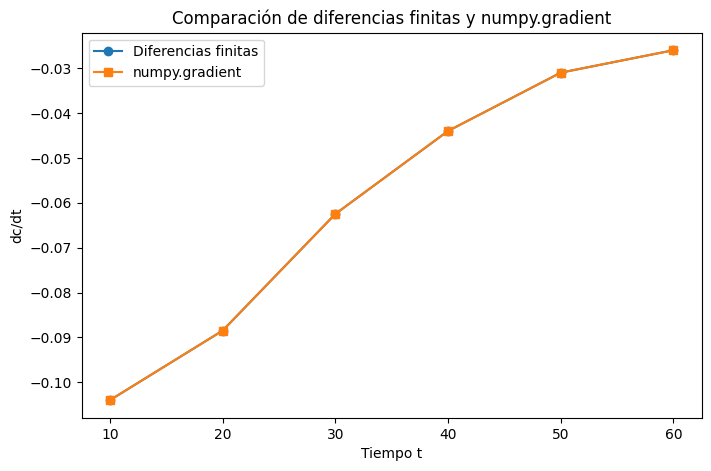

Orden de la reacción n: 0.8506
Constante de velocidad k: 0.0377


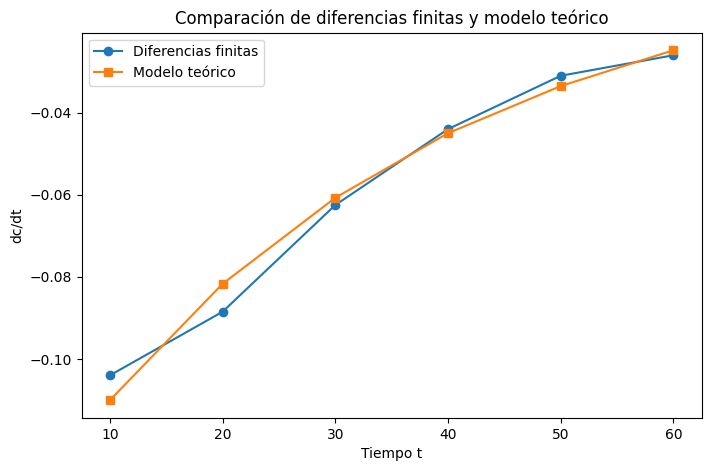

Error máximo: 0.0068


In [17]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def diferencias_finitas(t, c):
    dc_dt = np.zeros_like(c)
    h = t[1] - t[0]

    # Diferencias hacia adelante para el primer punto
    dc_dt[0] = (c[1] - c[0]) / h

    # Diferencias centradas para los puntos intermedios
    for i in range(1, len(c)-1):
        dc_dt[i] = (c[i+1] - c[i-1]) / (2*h)

    # Diferencias hacia atrás para el último punto
    dc_dt[-1] = (c[-1] - c[-2]) / h

    return dc_dt

# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

# a) Calcular derivada con diferencias finitas
dc_dt_finitas = diferencias_finitas(t, c)


# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(t, dc_dt_finitas, 'o-', label='Diferencias finitas')
plt.plot(t, dc_dt_np, 's-', label='numpy.gradient')
plt.xlabel('Tiempo t')
plt.ylabel('dc/dt')
plt.legend()
plt.title('Comparación de diferencias finitas y numpy.gradient')
plt.show()



In [25]:
# b) Comparar con numpy.gradient
dc_dt_np = np.gradient(c, t)


[-0.104  -0.0885 -0.0625 -0.044  -0.031  -0.026 ]


In [26]:
# c) Linealizar la ecuación ln(dc/dt) vs ln(c)
ln_c = np.log(c)
ln_dc_dt = np.log(-dc_dt_finitas)

slope, intercept, r_value, p_value, std_err = linregress(ln_c, ln_dc_dt)
n = slope
k = np.exp(intercept)

print(f"Orden de la reacción n: {n:.4f}")
print(f"Constante de velocidad k: {k:.4f}")

Orden de la reacción n: 0.8506
Constante de velocidad k: 0.0377


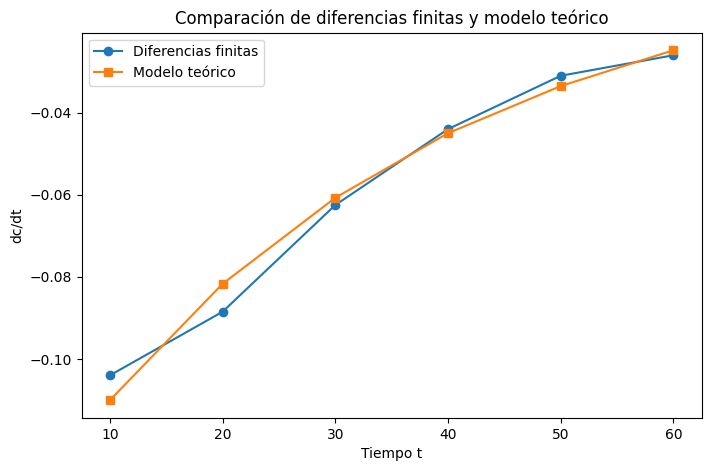

Error máximo: 0.0068


In [27]:

# d) Graficar dc/dt teórico vs experimental
c_teorico = k * c**n
dc_dt_teorico = -c_teorico

plt.figure(figsize=(8, 5))
plt.plot(t, dc_dt_finitas, 'o-', label='Diferencias finitas')
plt.plot(t, dc_dt_teorico, 's-', label='Modelo teórico')
plt.xlabel('Tiempo t')
plt.ylabel('dc/dt')
plt.legend()
plt.title('Comparación de diferencias finitas y modelo teórico')
plt.show()



In [28]:
# Error máximo
error_max = np.max(np.abs(dc_dt_finitas - dc_dt_teorico))
print(f"Error máximo: {error_max:.4f}")

Error máximo: 0.0068


# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




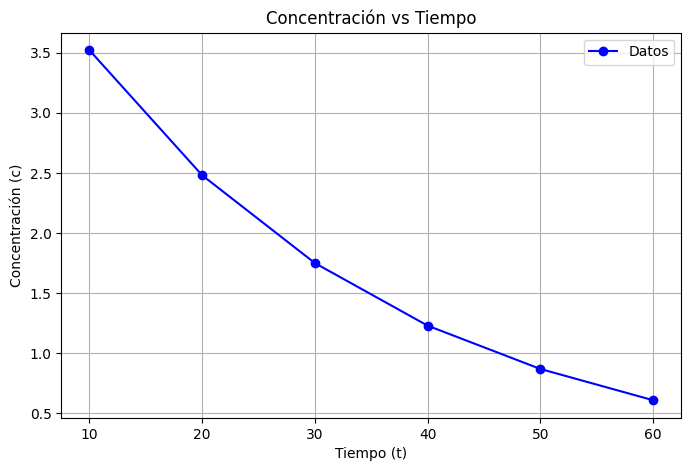

In [23]:

from scipy.interpolate import lagrange, CubicHermiteSpline
from numpy.polynomial.polynomial import Polynomial

# Datos
t_ = np.array([10, 20, 30, 40, 50, 60])
c_ = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])

# a) Gráfico de c(t)
plt.figure(figsize=(8,5))
plt.plot(t, c, 'bo-', label='Datos')
plt.xlabel('Tiempo (t)')
plt.ylabel('Concentración (c)')
plt.title('Concentración vs Tiempo')
plt.legend()
plt.grid()
plt.show()

In [20]:
# b) Interpolación de Lagrange y Hermite
poly_lagrange = lagrange(t_, c_)

c_deriv = np.gradient(c_, t_)
poly_Hermite = CubicHermiteSpline(t_, c_, c_deriv)

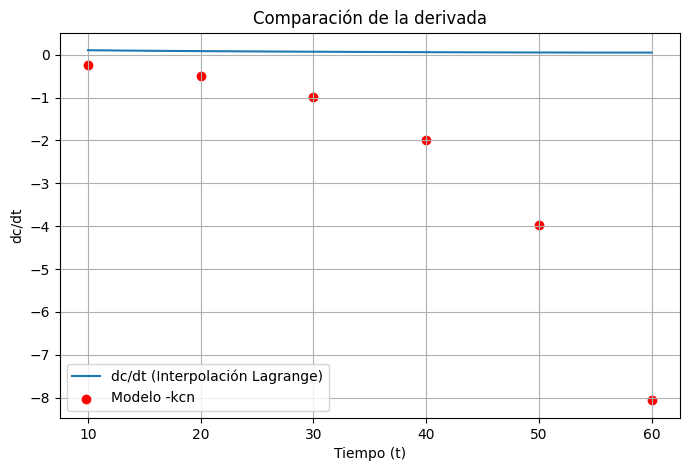

In [21]:
# c) Derivada de Lagrange
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
poly_derivative = poly_coef.deriv()

# Evaluamos la derivada en los puntos dados
t_fine = np.linspace(10, 60, 100)
dc_dt = poly_derivative(t_fine)

# Comparación con dcdt = -k * c^n (k=3, n=-2)
k = 3
n = -2
dc_dt_model = -k * (c**n)

plt.figure(figsize=(8,5))
plt.plot(t_fine, dc_dt, label="dc/dt (Interpolación Lagrange)")
plt.scatter(t, dc_dt_model, color='red', label="Modelo -kcn")
plt.xlabel('Tiempo (t)')
plt.ylabel('dc/dt')
plt.title('Comparación de la derivada')
plt.legend()
plt.grid()
plt.show()

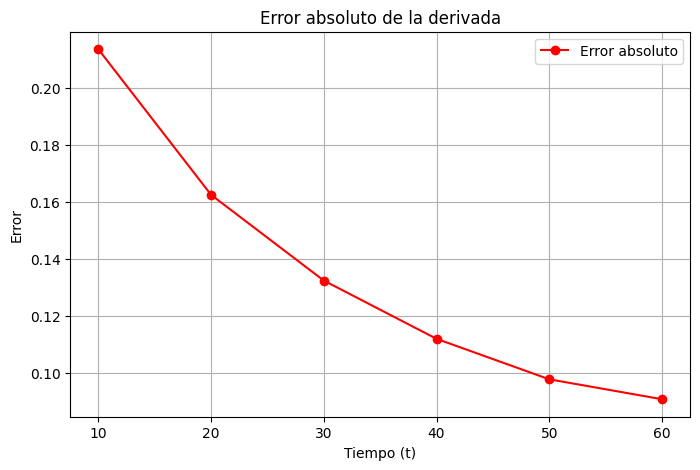

In [22]:
# d)
dc_dt_exact = -k * (c_**n)
error = np.abs(dc_dt_exact - poly_derivative(t))

plt.figure(figsize=(8,5))
plt.plot(t, error, 'ro-', label='Error absoluto')
plt.xlabel('Tiempo (t)')
plt.ylabel('Error')
plt.title('Error absoluto de la derivada')
plt.legend()
plt.grid()
plt.show()